So, the idea here is to have a note book going through and demoing the use of the code. Ideally I'll use the modules, but I may just redirect to notebooks as needed.

We'll be working with the May K2-31 Observation data I think, since it's been a long time since I've touched that. 

To save some Time and storage and computation, I'll say that the astrometry stuff has already been done, so we have a folder called "output" with the relevant files.

# Setting up the code to work

We have some modules we'd like to import, but ideally, as we create folders and maybe work on different instances and data sets, we want to keep them seperate. However, we would like to be able to use the same instance of a module everywhere. To do so, we need to let our python system know the path is there and that we'd like to use it.

In [1]:
#We need to make sure we can import the modules. To do so, we must specify the path to where they will live, 
# and let the system know that's a thing.
import sys
#/Users/aidanmcclung/Desktop/Summer_Exoplanets
sys.path.append('/Users/aidanmcclung/Desktop/Summer_Exoplanets')

#now we can import things from subfolders of that directory. (of which we should have the QAOP folder.)
#We can do this a variety of ways, which are demonstrated below.

from QAOP.test import hello

hello("Aidan") #The function should just say hello to me.

import QAOP.test as testmod

testmod.hello("aidan")

import QAOP.test

QAOP.test.hello("A McClung")

hello Aidan
hello aidan
hello A McClung


# Major Process

So, as far as what needs done:
The first thing is we need the "StarIDNotebook", which we will use to generate the list of stars and their locations, and give them names.

The existing StarIDNotebook (SIDN) needs a temporary directory 'myWorking' so I'll create that manually.

We're done as of the last cell where we've written the nameloc.csv file.

Next, we'll use the radialProfile notebook to create apertures.
This was something I did, and hopefully it worked okay. Will need to do some more troubleshooting and explaining to make sure.

However, we've now written a file called apertures.csv.
The next step will be to move onto photometery.

In [2]:
import QAOP.QAOP_photometry as QPhot
import numpy as np
import os
from astropy.table import Table

In [3]:
photinstance = QPhot.photInstance(apertureFilePath='apertures.csv')

In [4]:
print(photinstance.master_tab)

          Time          ...
----------------------- ...
2023-08-08T09:42:04.740 ...
2023-08-08T06:53:35.760 ...
2023-08-08T09:09:16.440 ...
2023-08-08T07:45:51.800 ...
2023-08-08T08:13:22.100 ...
2023-08-08T08:54:40.750 ...
2023-08-08T07:41:00.650 ...
2023-08-08T10:01:06.060 ...
2023-08-08T06:58:27.240 ...
2023-08-08T09:37:13.260 ...
                    ... ...
2023-08-08T07:25:12.120 ...
2023-08-08T06:49:58.620 ...
2023-08-08T09:40:51.310 ...
2023-08-08T07:49:30.790 ...
2023-08-08T09:10:29.690 ...
2023-08-08T07:39:47.300 ...
2023-08-08T08:51:01.950 ...
2023-08-08T06:59:40.620 ...
2023-08-08T10:04:44.860 ...
2023-08-08T07:20:20.880 ...
2023-08-08T06:30:33.230 ...
Length = 195 rows


In [4]:
#Now, we need to run this photometry. We can do that by calling the runForFile method with a file path
for fn in os.listdir('output'):
    filepath = 'output/'+fn
    photinstance.runForFile(filepath) #def runForFile(self,filepath):

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa

In [5]:
photinstance.exportMasterAsSimple()

time,sCA,sCB,sCD,sCE,sCF,sCG,sCH,sCI,sA,sB,sC,sD,sCJ,sCK,sCL,sBA,sBB,sBC,sBD,sBE,sCM,sCN,sCO,sCP,target
str23,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2023-08-08T09:42:04.740,202894.08615398838,313954.9860488031,207703.9338661193,470320.3124287261,234030.44847315716,325148.7535655866,410105.5273800412,244702.49751597896,280048.8531323841,262083.66669986647,226947.73046857247,244086.002126054,212511.89727843393,461593.742082751,213353.19869058992,231201.14049671675,166918.87759319128,235661.57918900793,196617.51162197068,195295.62594227894,519141.21575713146,280145.3289842269,259314.83602849854,353909.4961201241,262083.8853703795
2023-08-08T06:53:35.760,192477.7428323507,297692.0521922072,196052.37082560477,447671.8260992354,222984.19382416917,310547.9788742829,388265.0484670728,230171.23107409116,266220.93215913716,250124.50432812818,214412.2345333984,231303.37059092894,200323.78033072437,438846.6382113449,204081.0358016676,219231.63641776392,157739.08219809466,223266.30718356353,188049.08909547163,185235.3500835007,491552.1656846051,268850.68970127625,244489.42440612792,337985.67584678094,250097.9177385262
2023-08-08T09:09:16.440,205309.39479852596,318799.3260374045,209793.93353369329,478580.09137103637,238176.8276269067,328541.99601973116,414633.6845051346,247458.09943457026,283428.5758094187,263732.6388754897,229648.18698539634,246633.3087056984,214762.03037931162,465641.50276089343,218534.28884557582,233470.64730099728,170078.05409253036,238855.82989413646,199329.20164851254,196929.50219426074,528842.4863399633,285981.2415888472,263197.2955089346,360696.90063718817,263737.24664129893
2023-08-08T07:45:51.800,220736.24687770515,340235.3169935651,223522.80616598684,510360.43647518504,254765.87773706752,352633.10195759713,439879.01569564495,264651.78282246366,302822.0749587216,285868.2942389456,245523.61053075513,263956.04745079787,228890.73530311146,500554.6437906837,233829.20677206796,248873.2999840308,181672.2926724918,254973.82338255158,213987.75141326824,212569.6814561093,565055.3553955314,305304.99896731874,283987.2246301026,389029.13785859157,285884.37695630104
2023-08-08T08:13:22.100,219458.85928259976,339751.69110379845,223731.05727728087,513480.8940816568,255642.3309428823,352525.54422570113,440399.4838171599,262903.4211259215,301980.89989465155,283800.66333310126,245070.77661965444,263526.3722731091,227218.93118837549,496730.7757990272,232577.54328964782,248862.4563612435,180770.23043169786,253899.18763922987,214004.32900216308,211013.41613297246,568109.1409290613,305602.80200567667,279301.92397067556,386180.880551859,283812.60591210757
2023-08-08T08:54:40.750,206764.81958664992,317740.43599645066,209609.88543036417,478376.185962303,237493.63255985154,328697.8872567646,412655.8841379241,246616.15238571647,283878.07772384654,264086.42394810065,229736.36815131607,245240.2323600409,212066.87945785606,465815.83323496394,218524.9482922049,234225.45846359394,168796.38163054982,239051.8172148805,199519.5941504361,197567.6641233043,529337.9281117305,286631.76115225296,261783.21581865265,360470.0176203206,264082.91938706965
2023-08-08T07:41:00.650,213242.305306953,331538.4239191425,216489.5561174137,495508.6235035539,247309.90760523925,343119.1271746828,428555.4871367482,255611.58544413064,294291.5266843599,276544.01729527826,238139.50798930653,255941.4371507366,222242.98073879827,487122.9730419959,226511.08913845563,241190.2183143984,176216.54527867533,247500.94149741883,207013.4053366118,205619.79177097764,545262.2722089881,295287.27672721044,274496.5917569772,375738.24129487836,276473.9979341129
2023-08-08T10:01:06.060,205387.4854532662,318202.3879439977,210390.80657185917,483802.4885702023,239140.7591595485,331332.74393397325,414037.9223252055,247825.4940798782,286950.82766132714,266535.70237442874,230536.2218743111,247649.36299924427,214286.09388578462,468101.7730

Anyway, with all that done, we're officially done conducting the analysis! now we can make plots!



In [7]:
phot_tab = Table.read('photometry/simple.ecsv')
print(phot_tab)

          time                 sCA         ...       target      
----------------------- ------------------ ... ------------------
2023-08-08T09:42:04.740 202894.08615398838 ...  262083.8853703795
2023-08-08T06:53:35.760  192477.7428323507 ...  250097.9177385262
2023-08-08T09:09:16.440 205309.39479852596 ... 263737.24664129893
2023-08-08T07:45:51.800 220736.24687770515 ... 285884.37695630104
2023-08-08T08:13:22.100 219458.85928259976 ... 283812.60591210757
2023-08-08T08:54:40.750 206764.81958664992 ... 264082.91938706965
2023-08-08T07:41:00.650   213242.305306953 ...  276473.9979341129
2023-08-08T10:01:06.060  205387.4854532662 ... 266557.14176523674
2023-08-08T06:58:27.240 211523.17266657064 ...  272699.3377116804
2023-08-08T09:37:13.260 198730.60940182366 ... 255785.79592211446
                    ...                ... ...                ...
2023-08-08T07:25:12.120  182727.2505455189 ... 236366.17281756346
2023-08-08T06:49:58.620  210310.2143069702 ... 272705.87602497806
2023-08-08

In [8]:
#helper class
def getTimeFromDate(dateStr):
    #dateStr format: YYYY-MM-DD'T'HH:MM:SS.SSS
    split = dateStr.split(':')
    #print(split)
    hourStr = split[0][-2:]; minStr = split[1]; secStr = split[2]
    second = float(secStr); minute = float(minStr); hour = float(hourStr)
    #print(hour,minute,second)
    time = hour + (minute + (second/60))/60
    return time

#this is a useful method, idk where to put it
def genTimesFromTable(table,debug=False):
    times = np.zeros(len(table))
    for d,date in enumerate(table['time']):
        if debug: print(d,date)
        times[d] = getTimeFromDate(date)
    return times

In [9]:
phot_tab = Table.read('photometry/simple.ecsv')
times = genTimesFromTable(phot_tab)
val_tar = phot_tab['target'].data
val_sD = phot_tab['sA'].data

In [10]:
import matplotlib.pyplot as plt

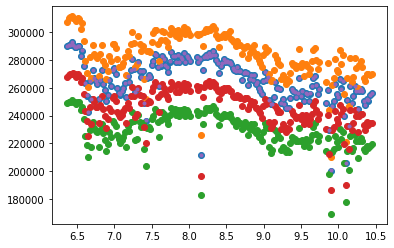

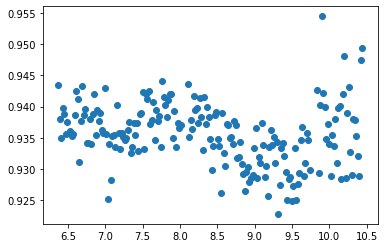

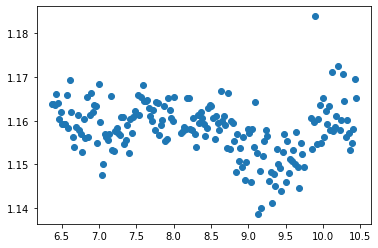

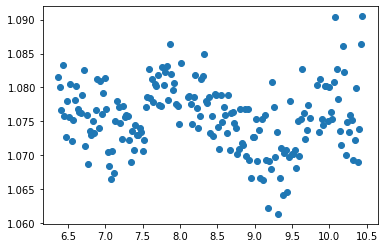

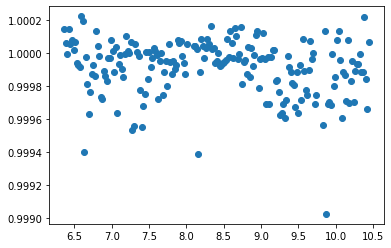

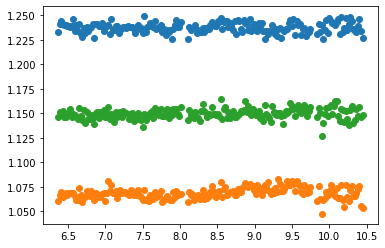

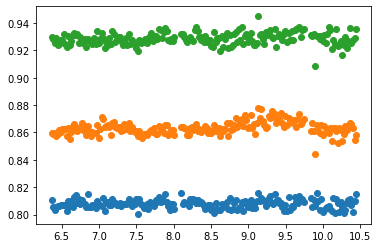

In [14]:
plt.plot(times,val_tar,'o')
plt.plot(times,val_sD,'o')
plt.plot(times,phot_tab['sC'],'o')
plt.plot(times,phot_tab['sD'],'o')
plt.plot(times,phot_tab['sB'],'.')
plt.show()
plt.plot(times,val_tar/phot_tab['sA'].data,'o')
plt.show()
plt.plot(times,val_tar/phot_tab['sC'].data,'o')
plt.show()
plt.plot(times,val_tar/phot_tab['sD'].data,'o')
plt.show()
plt.plot(times,val_tar/phot_tab['sB'].data,'o')
plt.show()
plt.plot(times,phot_tab['sA'].data/phot_tab['sC'].data,'o')
plt.plot(times,phot_tab['sA'].data/phot_tab['sB'].data,'o')
plt.plot(times,phot_tab['sA'].data/phot_tab['sD'].data,'o')
plt.show()
plt.plot(times,phot_tab['sC'].data/phot_tab['sA'].data,'o')
plt.plot(times,phot_tab['sC'].data/phot_tab['sB'].data,'o')
plt.plot(times,phot_tab['sC'].data/phot_tab['sD'].data,'o')
plt.show()